# Dogs vs Cats

## Dataset

In [20]:
import pathlib
import os
import shutil

In [21]:
base_dir = pathlib.Path('dogs-vs-cats')
src_dir = pathlib.Path('dogs-vs-cats-original/train')

In [7]:
print(base_dir / 'test')

dogs-vs-cats/test


In [ ]:
# the original dataset is at 'dogs-vs-cats-original'
# a new dataset folder is 'dogs-vs-cats' <-- this is for image_dataset_from_directory

# This function will create a folder identified by subset_name by copying images 
# from the 'train' directory at 'dogs-vs-cats-original'

# subset_name: train, validation, test
def make_dataset_for_image_dataset_from_directory(subset_name, start_index, end_index):
    for category in ("dog", "cat"):
        dir = base_dir / subset_name / category
        #print(dir)
        if os.path.exists(dir) is False:
            os.makedirs(dir)
        files = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        #print(files)
        for i, file in enumerate(files):
            shutil.copyfile(src=src_dir / file, dst=dir / file)
            if i % 100 == 0: # show only once every 100
                print(f'src:{src_dir / file} => dst:{dir / file}')





In [63]:
make_dataset_for_image_dataset_from_directory('train', 0, 1000)


src:dogs-vs-cats-original/train/dog.0.jpg => dst:dogs-vs-cats/train/dog/dog.0.jpg
src:dogs-vs-cats-original/train/dog.100.jpg => dst:dogs-vs-cats/train/dog/dog.100.jpg
src:dogs-vs-cats-original/train/dog.200.jpg => dst:dogs-vs-cats/train/dog/dog.200.jpg
src:dogs-vs-cats-original/train/dog.300.jpg => dst:dogs-vs-cats/train/dog/dog.300.jpg
src:dogs-vs-cats-original/train/dog.400.jpg => dst:dogs-vs-cats/train/dog/dog.400.jpg
src:dogs-vs-cats-original/train/dog.500.jpg => dst:dogs-vs-cats/train/dog/dog.500.jpg
src:dogs-vs-cats-original/train/dog.600.jpg => dst:dogs-vs-cats/train/dog/dog.600.jpg
src:dogs-vs-cats-original/train/dog.700.jpg => dst:dogs-vs-cats/train/dog/dog.700.jpg
src:dogs-vs-cats-original/train/dog.800.jpg => dst:dogs-vs-cats/train/dog/dog.800.jpg
src:dogs-vs-cats-original/train/dog.900.jpg => dst:dogs-vs-cats/train/dog/dog.900.jpg
src:dogs-vs-cats-original/train/cat.0.jpg => dst:dogs-vs-cats/train/cat/cat.0.jpg
src:dogs-vs-cats-original/train/cat.100.jpg => dst:dogs-vs-cat

In [64]:
make_dataset_for_image_dataset_from_directory('validation', 1000, 1500)

src:dogs-vs-cats-original/train/dog.1000.jpg => dst:dogs-vs-cats/validation/dog/dog.1000.jpg
src:dogs-vs-cats-original/train/dog.1100.jpg => dst:dogs-vs-cats/validation/dog/dog.1100.jpg
src:dogs-vs-cats-original/train/dog.1200.jpg => dst:dogs-vs-cats/validation/dog/dog.1200.jpg
src:dogs-vs-cats-original/train/dog.1300.jpg => dst:dogs-vs-cats/validation/dog/dog.1300.jpg
src:dogs-vs-cats-original/train/dog.1400.jpg => dst:dogs-vs-cats/validation/dog/dog.1400.jpg
src:dogs-vs-cats-original/train/cat.1000.jpg => dst:dogs-vs-cats/validation/cat/cat.1000.jpg
src:dogs-vs-cats-original/train/cat.1100.jpg => dst:dogs-vs-cats/validation/cat/cat.1100.jpg
src:dogs-vs-cats-original/train/cat.1200.jpg => dst:dogs-vs-cats/validation/cat/cat.1200.jpg
src:dogs-vs-cats-original/train/cat.1300.jpg => dst:dogs-vs-cats/validation/cat/cat.1300.jpg
src:dogs-vs-cats-original/train/cat.1400.jpg => dst:dogs-vs-cats/validation/cat/cat.1400.jpg


In [65]:
make_dataset_for_image_dataset_from_directory('test', 1500, 2500)

src:dogs-vs-cats-original/train/dog.1500.jpg => dst:dogs-vs-cats/test/dog/dog.1500.jpg
src:dogs-vs-cats-original/train/dog.1600.jpg => dst:dogs-vs-cats/test/dog/dog.1600.jpg
src:dogs-vs-cats-original/train/dog.1700.jpg => dst:dogs-vs-cats/test/dog/dog.1700.jpg
src:dogs-vs-cats-original/train/dog.1800.jpg => dst:dogs-vs-cats/test/dog/dog.1800.jpg
src:dogs-vs-cats-original/train/dog.1900.jpg => dst:dogs-vs-cats/test/dog/dog.1900.jpg
src:dogs-vs-cats-original/train/dog.2000.jpg => dst:dogs-vs-cats/test/dog/dog.2000.jpg
src:dogs-vs-cats-original/train/dog.2100.jpg => dst:dogs-vs-cats/test/dog/dog.2100.jpg
src:dogs-vs-cats-original/train/dog.2200.jpg => dst:dogs-vs-cats/test/dog/dog.2200.jpg
src:dogs-vs-cats-original/train/dog.2300.jpg => dst:dogs-vs-cats/test/dog/dog.2300.jpg
src:dogs-vs-cats-original/train/dog.2400.jpg => dst:dogs-vs-cats/test/dog/dog.2400.jpg
src:dogs-vs-cats-original/train/cat.1500.jpg => dst:dogs-vs-cats/test/cat/cat.1500.jpg
src:dogs-vs-cats-original/train/cat.1600.jp

## Let's make Dataset objects 
We are ready for `image_dataset_from_directory`

In [29]:
import tensorflow as tf

2024-11-18 19:18:33.995861: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-18 19:18:34.004416: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 19:18:34.073450: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 19:18:34.152093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-18 19:18:34.217215: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [22]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'train',
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.


In [34]:
for data_batch, labels_batch in train_dataset:
    print(f'data batch shape: {data_batch.shape}')
    print(f'label batch shape: {labels_batch.shape}')
    print(f'labels: {labels_batch}')
    break

data batch shape: (32, 180, 180, 3)
label batch shape: (32,)
labels: [0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1]


In [23]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'validation',
    image_size=(180,180),
    batch_size=32
)


Found 1000 files belonging to 2 classes.


In [24]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'test',
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.


## Design CNN Architecture

In [41]:
import tensorflow as tf
from tensorflow.keras import layers

In [42]:
inputs = layers.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)



In [43]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [44]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 89, 89, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 43, 43, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 20, 20, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        25,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,185 (192.13 KB)

 Trainable params: 49,185 (192.13 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [48]:
history = model.fit(train_dataset, epochs=20, 
                    validation_data=validation_dataset, 
                    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.5072 - loss: 0.7094 - val_accuracy: 0.5620 - val_loss: 0.6818
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.5779 - loss: 0.6761 - val_accuracy: 0.5920 - val_loss: 0.6793
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.6305 - loss: 0.6471 - val_accuracy: 0.6270 - val_loss: 0.6683
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.6653 - loss: 0.6174 - val_accuracy: 0.6210 - val_loss: 0.6437
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.6788 - loss: 0.5977 - val_accuracy: 0.6380 - val_loss: 0.6159
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.7004 - loss: 0.5719 - val_accuracy: 0.6760 - val_loss: 0.5979
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.7418 - loss: 0.5285 - val_accuracy: 0.6760 - val_loss: 0.5950
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.7455 - loss: 0.5218 - val_accuracy: 0

In [49]:
import matplotlib.pyplot as plt

In [50]:
acc = history.history['accuracy']
loss = history.history['loss']

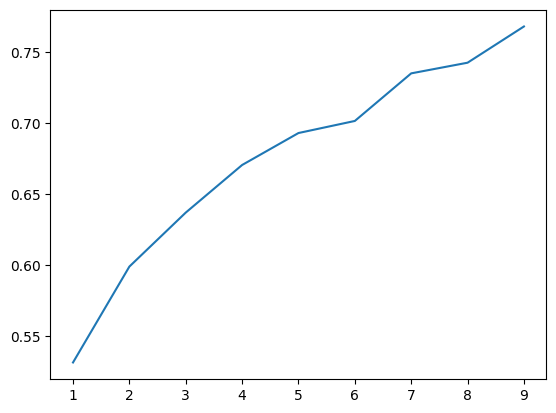

In [ ]:
plt.plot(range(1, len(acc)+1), acc, label='Traiing Acc')

In [53]:
for test_batch, labels_batch in test_dataset:
    predictions = model.predict(test_batch)
    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [54]:
predictions

array([[0.7054085 ],
       [0.159149  ],
       [0.5052124 ],
       [0.23638718],
       [0.8777362 ],
       [0.05473589],
       [0.44451216],
       [0.01595455],
       [0.23702046],
       [0.594128  ],
       [0.6742759 ],
       [0.12052899],
       [0.46567622],
       [0.9762608 ],
       [0.01735835],
       [0.70359135],
       [0.23325288],
       [0.6010729 ],
       [0.33249587],
       [0.14316894],
       [0.8310062 ],
       [0.00697708],
       [0.8447037 ],
       [0.19894731],
       [0.07290691],
       [0.22756903],
       [0.16533156],
       [0.24515186],
       [0.9723444 ],
       [0.5781151 ],
       [0.1054908 ],
       [0.39848435]], dtype=float32)

## Data Augmentation

In [46]:
import tensorflow as tf
from tensorflow.keras import layers
import datetime

In [47]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

In [48]:
inputs = layers.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
#x = layers.AveragePooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
x = layers.Dense(200, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


In [49]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [50]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_17            │ (None, 89, 89, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_18            │ (None, 43, 43, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_19            │ (None, 20, 20, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_20            │ (None, 9, 9, 256)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 200)            │     4,147,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,536,017 (17.30 MB)

 Trainable params: 4,536,017 (17.30 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
# delete logs from previous runs
!rm -rf ./logs/

In [53]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [54]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
]

In [55]:
history = model.fit(train_dataset, epochs=20, 
                    validation_data=validation_dataset, 
                    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 483ms/step - accuracy: 0.4807 - loss: 0.7412 - val_accuracy: 0.5010 - val_loss: 0.6909
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 516ms/step - accuracy: 0.5198 - loss: 0.6882 - val_accuracy: 0.5050 - val_loss: 0.6925
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 575ms/step - accuracy: 0.5347 - loss: 0.6902 - val_accuracy: 0.5020 - val_loss: 0.6935
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 552ms/step - accuracy: 0.5019 - loss: 0.6932 - val_accuracy: 0.5530 - val_loss: 0.6923
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 559ms/step - accuracy: 0.5727 - loss: 0.6874 - val_accuracy: 0.5950 - val_loss: 0.6807
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 536ms/step - accuracy: 0.5775 - loss: 0.6988 - val_accuracy: 0.4980 - val_loss: 0.7327
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 529ms/step - accuracy: 0.5304 - loss: 0.6834 - val_accuracy: 0.5580 - val_loss: 0.6626
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 537ms/step - accuracy: 0.5814 - loss: 0.6518 - val_accu

In [56]:
acc = history.history['accuracy']
loss = history.history['loss']

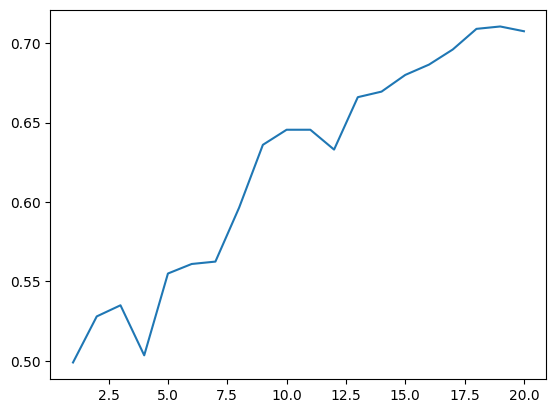

In [57]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(acc)+1), acc, label='Traiing Acc')

In [60]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [61]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 14954), started 0:01:37 ago. (Use '!kill 14954' to kill it.)